In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

## Asymptotic analysis of algorithms and big-O notation
This document provides a short exploration of asymptotic analysis of algorithms and big-O notation.

Information found in this document is synthesised from Appendix A of AI a modern approach, by Russel and Norvig, from
this video: [What Is Big O Notation?](https://www.youtube.com/watch?v=Q_1M2JaijjQ), and from this article: [Asymptotic
analysis](https://deepai.org/machine-learning-glossary-and-terms/asymptotic-analysis)

Before we can tackle big-O notation, we need to understand asymptotic analysis. Asymptotic analysis is an approach to
evaluating the performance of algorithms.

The article [Asymptotic analysis](https://deepai.org/machine-learning-glossary-and-terms/asymptotic-analysis) describes
asymptotic analysis as follows: "Asymptotic analysis is the process of calculating the running time of an algorithm in mathematical
units to find the program’s limitations, or “run-time performance.” The goal is to determine the best case, worst case and
average case time required to execute a given task."

### Let's see how it works:
Suppose you are testing two algorithms designed to find the sets of three non-negative integers that sum to integer $n$.
Let's call them "Alice's algorithm" and "Bob's algorithm".

In [4]:
# Alice's algorithm
def alice_solution(n):
    solutions = []
    for a in range(n+1):
        for b in range(n+1):
            for c in range(n+1):
                if a + b + c == n:
                    solutions.append((a, b, c))
    return solutions

# Bob's algorithm
def bob_solution(n):
    solutions = []
    for a in range(n+1):
        for b in range(n+1):
            c = n - (a + b)
            if c >= 0:
                solutions.append((a, b, c))
    return solutions

How should we approach evaluating the efficiencies of these two algorithms to determine which is best for our purposes?

Whichever approach we may take, we need to evaluate the function for a distribution of input sizes - in other words, for
a selection of different conditions.

One approach might be to consider the time it takes to run each algorithm for different size inputs. Let's try that:

In [5]:
# Time-based evaluation function
def evaluate_time(function):
    inputs = list(range(1, 50))
    results = []
    for i in inputs:
        start = time.time()
        function(i)
        end = time.time()
        results.append(end - start)
    return results

df_time_evals = pd.DataFrame({
    "Alice's algorithm's performance":evaluate_time(alice_solution),
    "Bob's algorithm's performance":evaluate_time(bob_solution)
})

Consider this plot of the performance data for both algorithms:

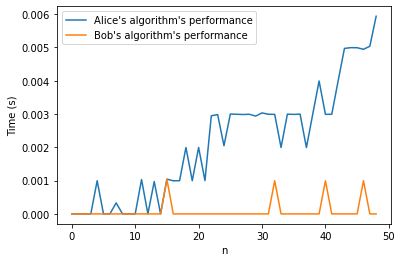

In [6]:
# plot_data function
def plot_data(data, xlab=None, ylab=None):
    df = pd.DataFrame(data)
    df.plot()
    if xlab is not None:
        plt.xlabel(xlab)
    if ylab is not None:
        plt.ylabel(ylab)
    plt.show()

plot_data(df_time_evals, "n", "Time (s)")

This is a good start, as we can start to see that for larger inputs, or in other words, larger values of $n$, Alice's
solution seems slower than Bob's.

The problem with this approach is that if we run this test on different machines, we might get different result due to
the differences in their hardware's capabilities. We need an approach which would be **machine-independent**.

One machine-independent option might be to count the number of steps performed running the algorithm. Let's try that
using adjusted versions of Alice and Bob's algorithms:

In [25]:
# Alice's adjusted algorithm
def alice_solution(n):
    steps = 0
    for a in range(n+1):
        for b in range(n+1):
            for c in range(n+1):
                steps += 1
                # if a + b + c == n:
                #     pass
    return steps

# Bob's adjusted algorithm
def bob_solution(n):
    steps = 0
    for a in range(n+1):
        for b in range(n+1):
            steps += 1
            # c = n - (a + b)
            # if c >= 0:
            #     pass
    return steps

# Step-based evaluation function
def evaluate_steps(function):
    inputs = list(range(1, 50))
    results = []
    for i in inputs:
        results.append(function(i))
    return results

df_steps_eval = pd.DataFrame({
    "Alice's algorithm's performance":evaluate_steps(alice_solution),
    "Bob's algorithm's performance":evaluate_steps(bob_solution)
})

Consider this plot of the performance data for both algorithms:

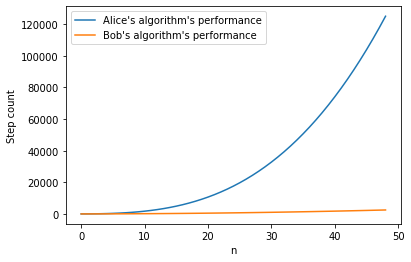

In [8]:
plot_data(df_steps_eval, "n", "Step count")

and consider this plot using $log(n)$ as the x-axis scale:

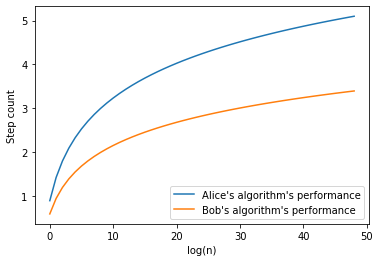

In [95]:
df_steps_eval_log = np.log10(df_steps_eval)
plot_data(df_steps_eval_log, "log(n)", "Step count")

For any input size $n$, the number of steps will equal $10^s$, for example, at an input size of $n=10$, the step count
$s=10^3$ for Alice's algorithm and $s=10^2$ for Bob's algorithm.

This is an improvement, but computing the function for a distribution of values of n takes a lot of time and avoidable
work.

We can avoid this extra work and do better by going even further and **generalising the formula for the algorithm's
performance by generalising the step count for any input value of $n$.** Let's see how that looks:

For any $n$ value, Alice's algorithm runs $a$ times

$a = (n+1) \cdot (n + 1) \cdot (n + 1)$ and $a = (n + 1) ^ 3$

For any n value, Bob's algorithm runs $b$ times

$b = (n+1) \cdot (n + 1)$ and $b = (n + 1) ^ 2$

If we expand the the formulas for a and b, we get the following polynomials:

$a = n^3 + n^2 + 3 \cdot n + 1$ and $b = n^2 + 2 \cdot n + 1$

Looking at these polynomials allows us to make yet another simplification to make things easier for us!

**One term in the polynomial accounts for the largest portion of the performance results** which are obtained using the
generalised performance formula for each algorithm (this is true for any continuous distribution of $n$).

In Alice's algorithm's performance polynomial formula, the dominating term is $n^3$, and in Bob's algorithm's performance
polynomial formula, it is $n^2$. Let's remember these terms and forget the rest.

We'll lose a little technical accuracy in exchange for more clarity and simplicity.

We'll say that for Alice's algorithm, the performance is approximately $n^3$, and for Bob's, it is approximately $n^2$.

### Big-O notation

**Computer scientists use a special notation called big-O notation to express the previously described approximations.**

Using big-O notation, we would write the last two statements about Alice's and Bob's algorithms as $\mathcal{O}(n^3)$ and
$\mathcal{O}(n^2)$ respectively.

In big-O notation, we discard constants: Imagine a hypothetical third algorithm, Jamie's algorithm, for which the performance
formula in expanded polynomial form is $3 \cdot n^3 + n^2 + 2 \cdot n + 1$. The big-O form notation for this algorithm's
performance would be $\mathcal{O}(n^3)$, because the $3 \cdot n^3$ term of the polynomial dominates the equation, and because we ignore
constants, which causes us to ignore $3$.

#### Formal big-O notation definition:
Let $f(n)$ and $g(n)$ be functions from positive integers to positive reals.
$f = \mathcal{O}(g)$ if there is a constant $c>0$ such that $f(n)<=c \cdot g(n)$ for large $n$.

What the last sentence means in layperson's terms is that for large enough values of $n$, and any constant $c$ superior to $0$, $f(n)$ grows no faster
than $g(n) \cdot c$

Example:

$f(n) = 3 \cdot n^3 + n^2 + 2 \cdot n + 1 \rightarrow \mathcal{O}(n^3) \rightarrow g(n) = n^2$

The function $f(n)$ returns the expanded form of the performance equation of the algorithm:

$f(n) = 3 \cdot n^3 + n^2 + 2 \cdot n + 1$

The function $g(n)$ returns the big-O

$g(n) = n^3$

Let's plot the expanded polynomial formula in the example above against big-O:

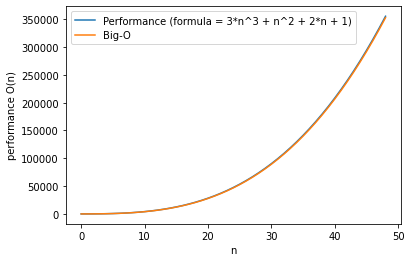

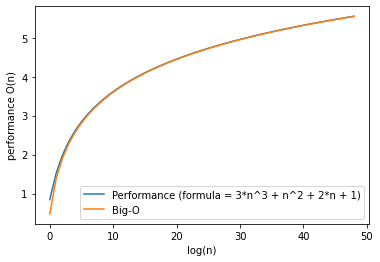

In [102]:
c = 3 # constant c must satisfy the criteria c*big_O>=performance

# Create the vectors x and y
n = np.array(range(1, 50))
performance = 3*n**3+n**2+2*n+1
big_O = n**3*c

df_big_O_eval = pd.DataFrame({
    "Performance (formula = 3*n^3 + n^2 + 2*n + 1)":performance,
    "Big-O": big_O
})
plot_data(df_big_O_eval, "n", "performance O(n)")
plot_data(np.log10(df_big_O_eval), "log(n)", "performance O(n)")

### Big-O and other notations cheat-sheet
Big-O notation is one of the three main notations for the limiting behaviour of an algorithm. The different notations are
expressed graphically using simple notation:

- Big-O notation $\mathcal{O}(n)$ is the notation of the upper bound of an algorithm's running time and measures the
worst case scenario of how long an algorithm can possibly take to complete a given operation.
- $\Omega(n)$ is the lower bound of an algorithm's running time and measures the best case scenario of how long an
algorithm can possibly take to complete a given operation.
- $\Theta(n)$ is charting both the upper and lower running time boundaries, with the average case scenario express as
the average between each border.

### TL;DR: How do I get the big-O of an algorithm?
1. Find the formula for the number of steps taken in one algorithm run for any value of $n$.
2. Expand the formula and find the dominating term of the equation.
3. Drop any constants in the dominating term of the equation, and keep the rest.
4. Note the big-O of the formula as $\mathcal{O}(term)$

**Example:**

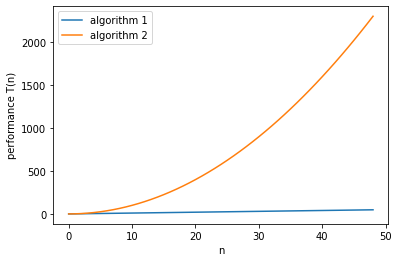

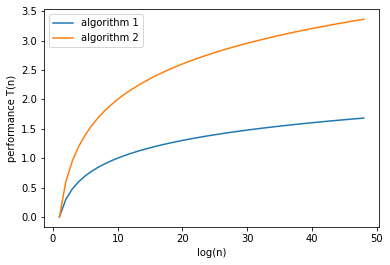

In [99]:
def sum_of_even_1(series):
    sum = 0
    steps = 0
    for i in series:
        steps += 1
        if i%2 == 0:
            sum += i
    return steps, sum

def sum_of_even_2(series):
    sum = 0
    steps = 0
    for i in series:
        sum += i
        for i in range(len(series)):
            # do nothing (this bit it purely here to make the algorithm less efficient)
            steps += 1
    return steps, sum

def evaluate_steps(function):
    inputs = list(range(1, 50)) # values of n
    results = []
    for i in inputs:
        results.append(function(range(1,i))[0])
    return results

performance_df = pd.DataFrame({
    "algorithm 1": evaluate_steps(sum_of_even_1),
    "algorithm 2": evaluate_steps(sum_of_even_2)
})

plot_data(performance_df, "n", "performance T(n)")
plot_data(np.log10(performance_df), "log(n)", "performance T(n)")

Looking at both algorithms, we can see that the first will run with a performance of $n$, and the second will run with
a performance of $n^2$. These are the performance formulas of the algorithms.

Here, the performance formulas are already as expanded as they'll get, so the dominating term of the formulas happen to
be the same as the whole formula: $n$, and $n^2$.

We can plot them against each other:

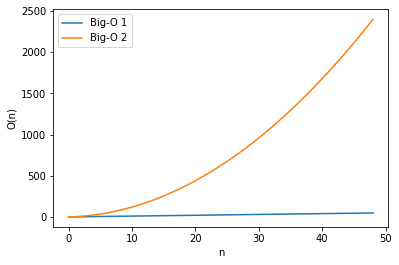

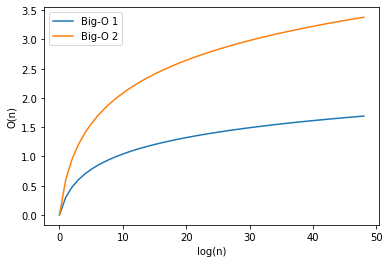

In [101]:
c = 1 # constant c must satisfy the criteria c*big_O>=performance

# Create the vectors x and y
n = np.array(range(1, 50))
big_O_1 = c*n
big_O_2 = c*n**2

df_big_O_eval = pd.DataFrame({
    "Big-O 1": big_O_1,
    "Big-O 2": big_O_2
})
plot_data(df_big_O_eval, "n", "O(n)")
plot_data(np.log10(df_big_O_eval), "log(n)", "O(n)")